In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, ttest_1samp, ttest_rel, ttest_ind, f_oneway, shapiro, kstest, levene, pearsonr, spearmanr, chisquare, chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from scipy.stats import chi2_contingency

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [10]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [11]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [12]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [13]:
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [14]:
df.describe(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


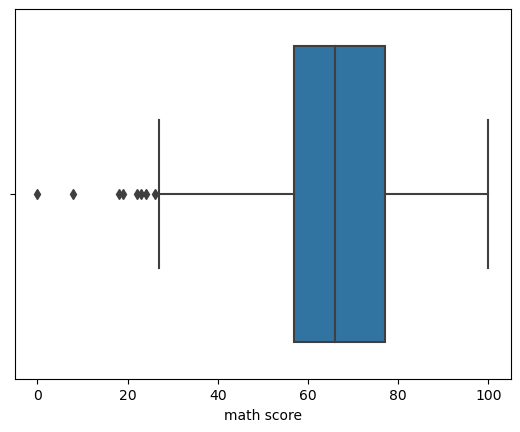

In [15]:
# Outlier detection
sns.boxplot(x=df['math score'])
plt.show()

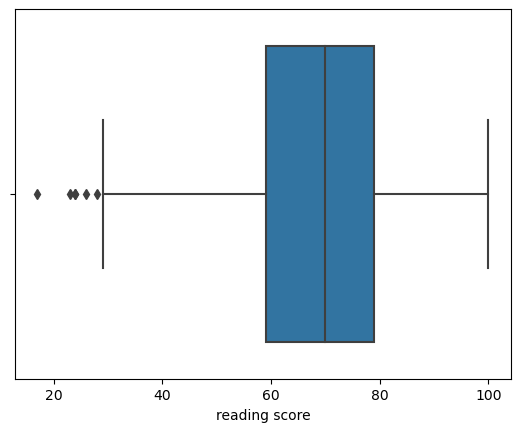

In [16]:
sns.boxplot(x=df['reading score'])
plt.show()

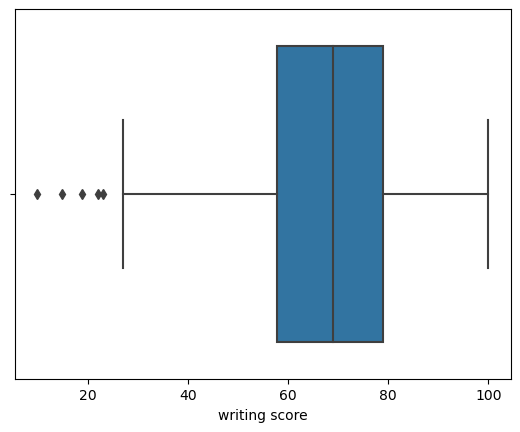

In [17]:
sns.boxplot(x=df['writing score'])
plt.show()

Math Score

In [18]:
norm.interval(0.95,loc=df['math score'].mean(),scale=df['math score'].std())

(36.369909117125296, 95.8080908828747)

Reading score

In [19]:
norm.interval(0.95,loc=df['reading score'].mean(),scale=df['reading score'].std())

(40.553149635613565, 97.78485036438643)

Writing score¶

In [20]:
norm.interval(0.95,loc=df['writing score'].mean(),scale=df['writing score'].std())

(38.27105953727193, 97.83694046272808)

Analysis

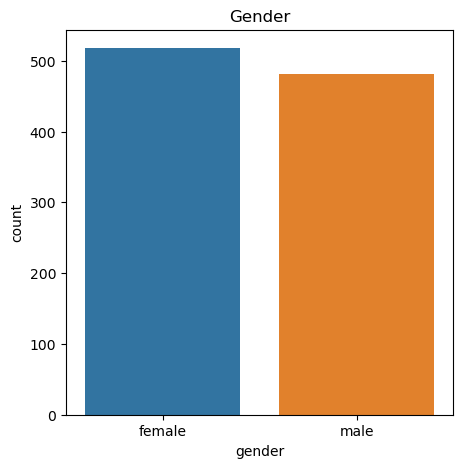

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['gender'])
plt.title('Gender')
plt.show()

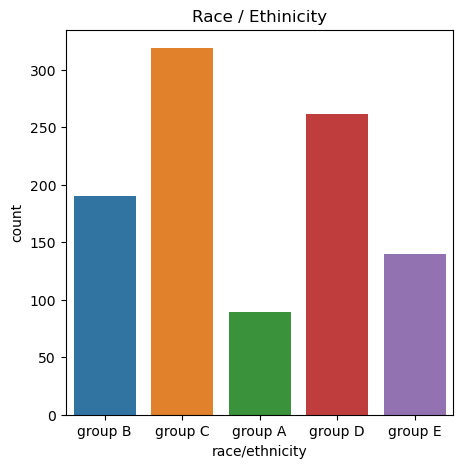

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['race/ethnicity'])
plt.title('Race / Ethinicity')
plt.show()

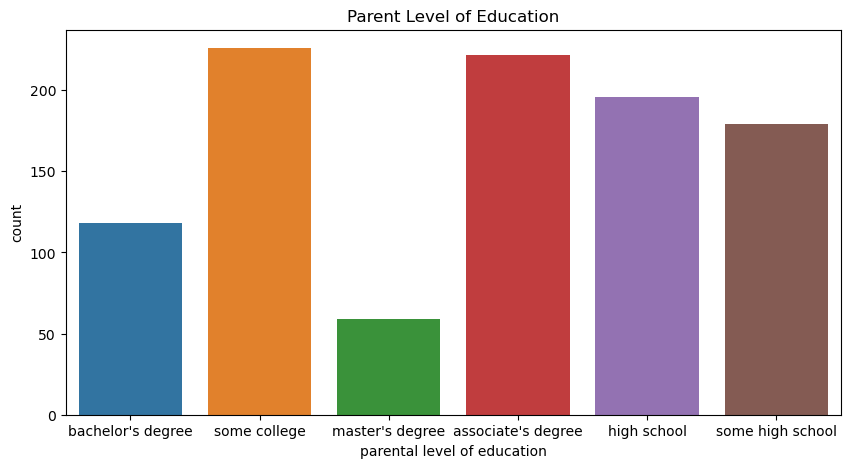

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['parental level of education'])
plt.title('Parent Level of Education')
plt.show()

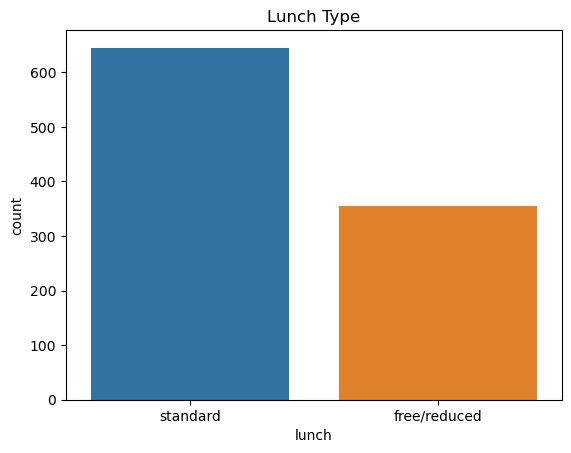

In [24]:
sns.countplot(x=df['lunch'])
plt.title('Lunch Type')
plt.show()

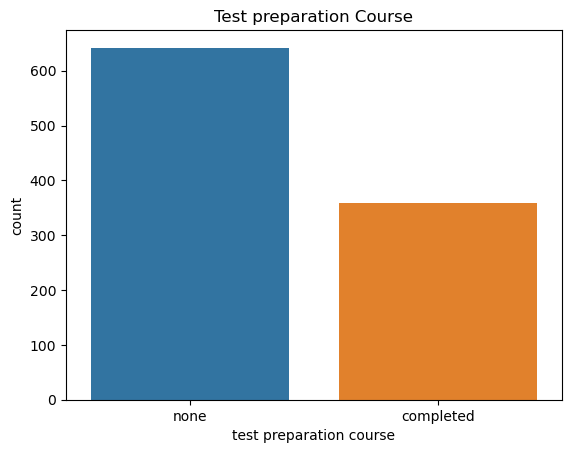

In [25]:
sns.countplot(x=df['test preparation course'])
plt.title('Test preparation Course')
plt.show()

# Hypothesis Testing

In [26]:
df['TotalScore']=df['math score']+df['reading score']+df['writing score']
# alpha value is 5%
alpha=0.05
male_score=df[df['gender']=='male']['TotalScore']
female_score=df[df['gender']=='female']['TotalScore']
tstat,pvalue=ttest_ind(male_score,female_score,alternative='two-sided')
if pvalue<alpha:
    print('p-value: ',pvalue)
    print('We reject Null hypothesis and we can conclude that Score is dependent on Gender')
else:
    print('We fail to reject Null Hypthesis')

p-value:  3.311973638243664e-05
We reject Null hypothesis and we can conclude that Score is dependent on Gender


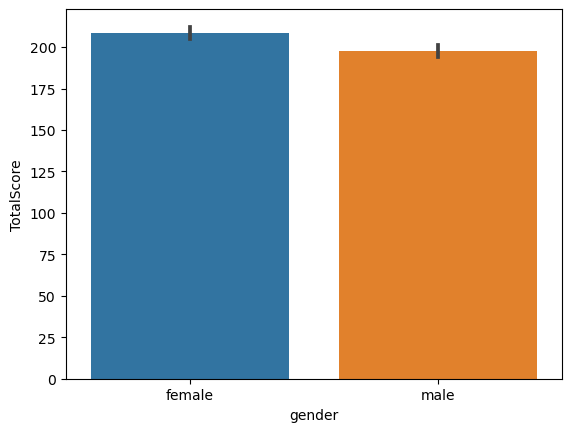

In [27]:
sns.barplot(data=df,x='gender',y='TotalScore')
plt.show()

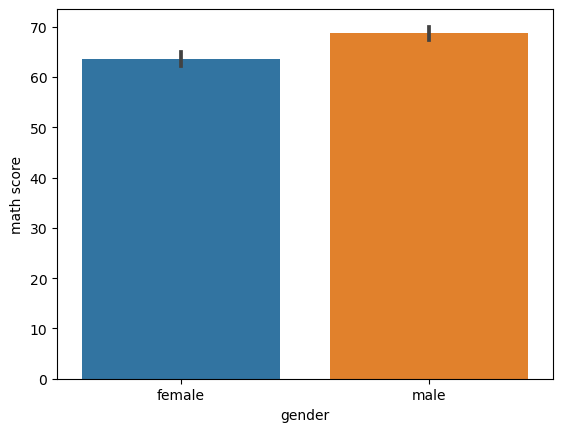

In [28]:
sns.barplot(x=df['gender'],y=df['math score'])
plt.show()

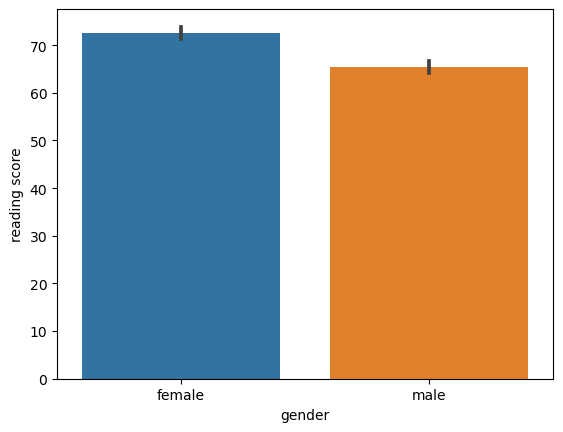

In [29]:
sns.barplot(x=df['gender'],y=df['reading score'])
plt.show()

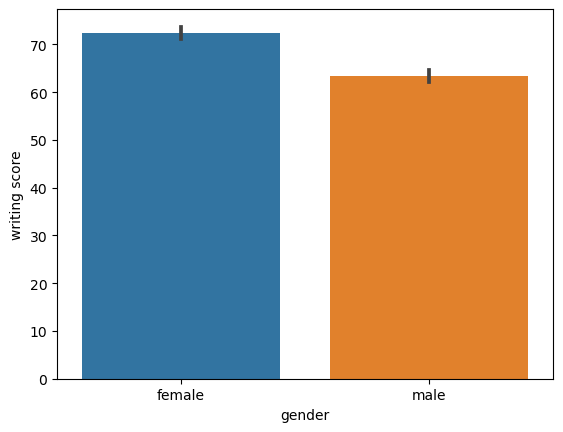

In [30]:
sns.barplot(x=df['gender'],y=df['writing score'])
plt.show()

Conclusion:

We conclude that Female students score more marks overall compared to Male students

Girls score more in reading and writing category compared to boys

Boys score more in math compared to Girls

## 2. Race/Ethincity vs Total Score

In [31]:
groupA=df[df['race/ethnicity']=='group A']['TotalScore']
groupB=df[df['race/ethnicity']=='group B']['TotalScore']
groupC=df[df['race/ethnicity']=='group C']['TotalScore']
groupD=df[df['race/ethnicity']=='group D']['TotalScore']
fstat,pvalue=f_oneway(groupA,groupB,groupC,groupD)
if pvalue<alpha:
    print('p-value: ',pvalue)
    print('We reject Null hypothesis and we can conclude that Score is dependent on Race/Ethincity')
else:
    print('We fail to reject Null Hypthesis')

p-value:  0.0011736349203983238
We reject Null hypothesis and we can conclude that Score is dependent on Race/Ethincity


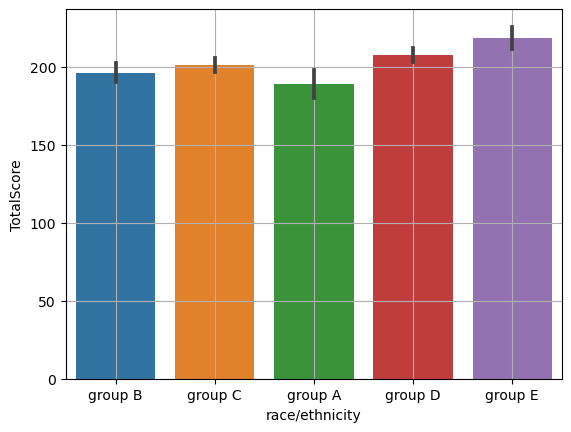

In [32]:
sns.barplot(data=df,x='race/ethnicity',y='TotalScore')
plt.grid()
plt.show()

# 3. Parental level of Education vs Total Score

In [33]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [34]:
bachelor=df[df['parental level of education']=="bachelor's degree"]['TotalScore']
college=df[df['parental level of education']=="some college"]['TotalScore']
masters=df[df['parental level of education']=="master's degree"]['TotalScore']
associate=df[df['parental level of education']=="associate's degree"]['TotalScore']
highschool=df[df['parental level of education']=="high school"]['TotalScore']
sub_highschool=df[df['parental level of education']=="some high school"]['TotalScore']
fstat,pvalue=f_oneway(bachelor,college,masters,associate,highschool,sub_highschool)
if pvalue<alpha:
    print('p-value: ',pvalue)
    print('We reject Null hypothesis and we can conclude that Score is dependent for all level of educations of parents.')
else:
    print('p-value: ',pvalue)
    print('We fail to reject Null Hypthesis,we conclude that students score are independent for all level of educations of parents.')

p-value:  4.3810464809431664e-10
We reject Null hypothesis and we can conclude that Score is dependent for all level of educations of parents.


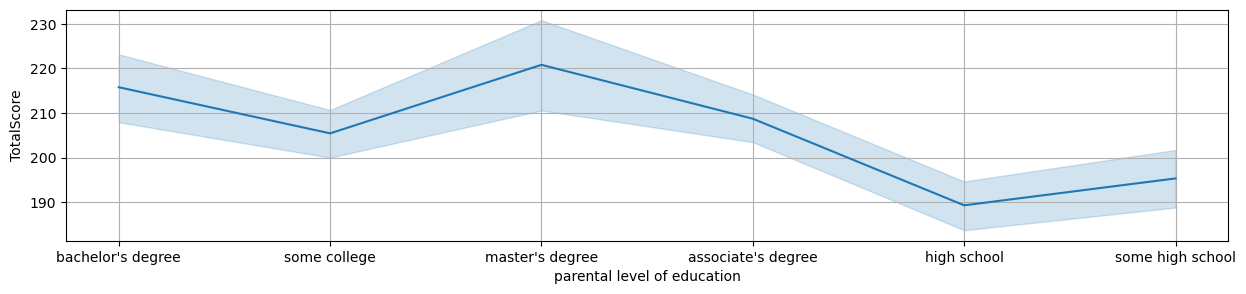

In [35]:
plt.figure(figsize=(15,3))
sns.lineplot(data=df,x='parental level of education',y='TotalScore')
plt.grid()
plt.show()

Conclusion:

We can notice that students score more if there parent's level of education is Master's degree followed by Bachelor's degree in all 3 cases

When the parent's level of education is Highschool or some high school then the score is very less. School should pay extra attention to such kind.

# 4. Lunch vs Total Score

In [36]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [37]:
standard=df[df['lunch']=="standard"]['TotalScore']
free=df[df['lunch']=="free/reduced"]['TotalScore']
fstat,pvalue=ttest_ind(standard,free,alternative='greater')
if pvalue<alpha:
    print('p-value: ',pvalue)
    print('We reject Null hypothesis and we can conclude that Score is dependent on lunch type.')
else:
    print('p-value: ',pvalue)
    print('We fail to reject Null Hypthesis,we conclude that students score are independent on lunch type.')

p-value:  3.868395906247775e-21
We reject Null hypothesis and we can conclude that Score is dependent on lunch type.


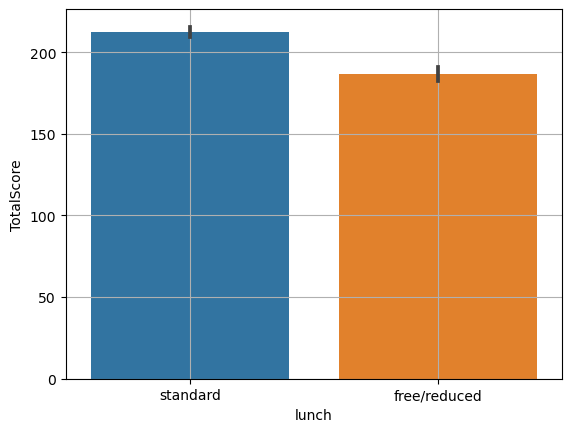

In [38]:
sns.barplot(data=df,x='lunch',y='TotalScore')
plt.grid()
plt.show()

Conclusion: 

We can notice that students score more if lunch type is standard, so school should infrom students to prefer standard lunch

# 5. Test preparation course status vs TotalScore

In [39]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [40]:
none=df[df['test preparation course']=='none']['TotalScore']
completed=df[df['test preparation course']=='completed']['TotalScore']
ttest_ind(none,completed,alternative='less')
if pvalue<alpha:
    print('p-value: ',pvalue)
    print('We reject Null hypothesis and we can conclude that Score is dependent on test preparation course status.')
else:
    print('p-value: ',pvalue)
    print('We fail to reject Null Hypthesis,we conclude that students score are independent on test preparation course status.')

p-value:  3.868395906247775e-21
We reject Null hypothesis and we can conclude that Score is dependent on test preparation course status.


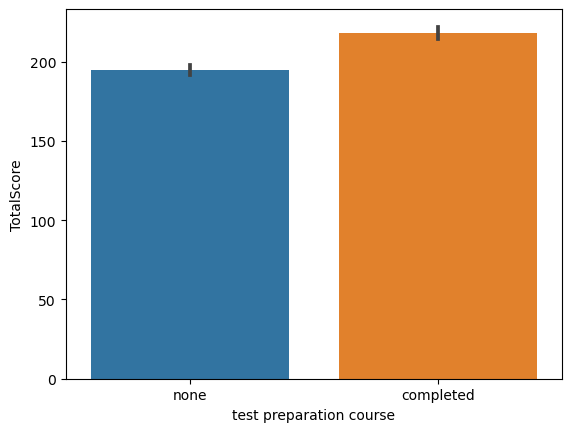

In [41]:
sns.barplot(data=df,x='test preparation course',y='TotalScore')
plt.show()

Conclusion:

We can notice that students score more if test preparation course, so school should infrom students to complete the course for better relsults

# 6. Does Race depends on Lunch Type of students?

In [42]:
contingency=pd.crosstab(df['lunch'],df['race/ethnicity'])
contingency

race/ethnicity,group A,group B,group C,group D,group E
lunch,,,,,
free/reduced,36,69,114,95,41
standard,53,121,205,167,99


In [43]:
from scipy.stats import chi2_contingency
cstat,pvalue,dof,expected=chi2_contingency(contingency)
if pvalue<alpha:
    print('p-value: ',pvalue)
    print('We reject Null hypothesis and we can conclude that  Preference of Lunch is dependent on Race')
else:
    print('p-value: ',pvalue)
    print('We fail to reject Null Hypthesis,we conclude that Preference of Lunch is not dependent on Race')

p-value:  0.48669808284196514
We fail to reject Null Hypthesis,we conclude that Preference of Lunch is not dependent on Race


# 7. Does Parental level of education depends on Lunch type preference?

In [44]:
contingency=pd.crosstab(df['lunch'],df['parental level of education'])
contingency

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
lunch,,,,,,
free/reduced,77,44,70,24,79,61
standard,145,74,126,35,147,118


In [45]:
cstat,pvalue,dof,expected=chi2_contingency(contingency)
if pvalue<alpha:
    print('p-value: ',pvalue)
    print('We reject Null hypothesis and we can conclude that  Preference of Lunch is dependent on parental level of education')
else:
    print('p-value: ',pvalue)
    print('We fail to reject Null Hypthesis,we conclude that Preference of Lunch is not dependent on parental level of education')

p-value:  0.9531014927218224
We fail to reject Null Hypthesis,we conclude that Preference of Lunch is not dependent on parental level of education


# 8. Do we have any preference observation in Gender and Lunch type selection?

In [46]:
contingency=pd.crosstab(df['lunch'],df['gender'])
contingency

gender,female,male
lunch,,
free/reduced,189,166
standard,329,316


In [47]:
cstat,pvalue,dof,expected=chi2_contingency(contingency)
if pvalue<alpha:
    print('p-value: ',pvalue)
    print('We reject Null hypothesis and we can conclude that  Preference of Lunch is dependent on gender')
else:
    print('p-value: ',pvalue)
    print('We fail to reject Null Hypthesis,we conclude that Preference of Lunch is not dependent on gender')

p-value:  0.5420584175146086
We fail to reject Null Hypthesis,we conclude that Preference of Lunch is not dependent on gender


# 9. Does Parental Level of education has any difference in Test preparation course status?

In [48]:
contingency=pd.crosstab(df['test preparation course'],df['parental level of education'])
contingency

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
test preparation course,,,,,,
completed,82,46,56,20,77,77
none,140,72,140,39,149,102


In [49]:
cstat,pvalue,dof,expected=chi2_contingency(contingency)
if pvalue<alpha:
    print('p-value: ',pvalue)
    print('We reject Null hypothesis and we can conclude that Test preparation course status is dependent on parental level of education')
else:
    print('p-value: ',pvalue)
    print('We fail to reject Null Hypthesis,we conclude that Test preparation course status is not dependent on parental level of education')

p-value:  0.08923388625809343
We fail to reject Null Hypthesis,we conclude that Test preparation course status is not dependent on parental level of education


# Bootstrapping the Questions

# Number 1

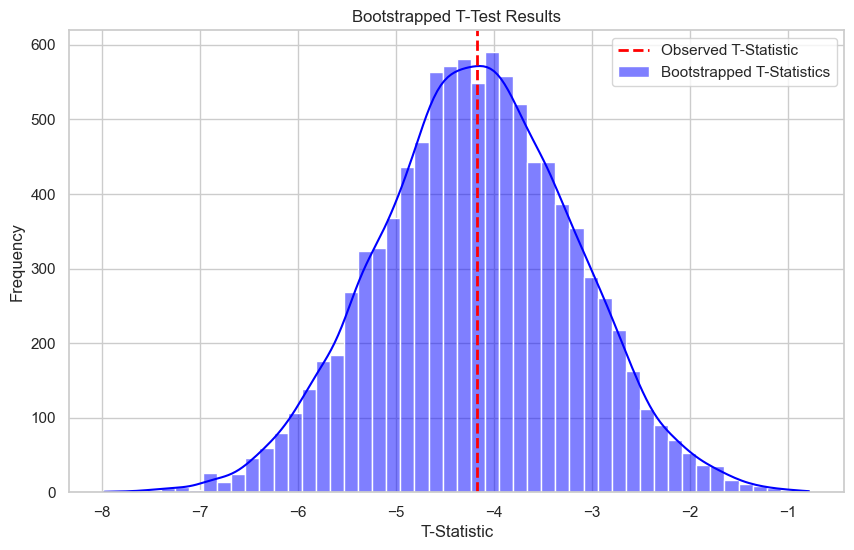

Bootstrapped p-value:  0.5036
We fail to reject Null Hypothesis based on bootstrapped results.


In [64]:
def bootstrap_ttest(data1, data2, num_resamples=10000):
    t_statistic_bootstrapped = np.zeros(num_resamples)
    for i in range(num_resamples):
        sample1 = np.random.choice(data1, len(data1), replace=True)
        sample2 = np.random.choice(data2, len(data2), replace=True)
        t_statistic_bootstrapped[i], _ = ttest_ind(sample1, sample2, alternative='two-sided')
    return t_statistic_bootstrapped

t_statistic_observed, p_value_observed = ttest_ind(male_score, female_score, alternative='two-sided')

t_statistic_bootstrapped = bootstrap_ttest(male_score, female_score)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(t_statistic_bootstrapped, bins=50, kde=True, color='blue', label='Bootstrapped T-Statistics')
plt.axvline(t_statistic_observed, color='red', linestyle='dashed', linewidth=2, label='Observed T-Statistic')
plt.xlabel('T-Statistic')
plt.ylabel('Frequency')
plt.title('Bootstrapped T-Test Results')
plt.legend()
plt.show()

p_value_bootstrapped = (np.abs(t_statistic_bootstrapped) > np.abs(t_statistic_observed)).mean()

alpha = 0.05
if p_value_bootstrapped < alpha:
    print('Bootstrapped p-value: ', p_value_bootstrapped)
    print('We reject Null hypothesis and conclude that Score is dependent on Gender.')
else:
    print('Bootstrapped p-value: ', p_value_bootstrapped)
    print('We fail to reject Null Hypothesis based on bootstrapped results.')

# Number 2

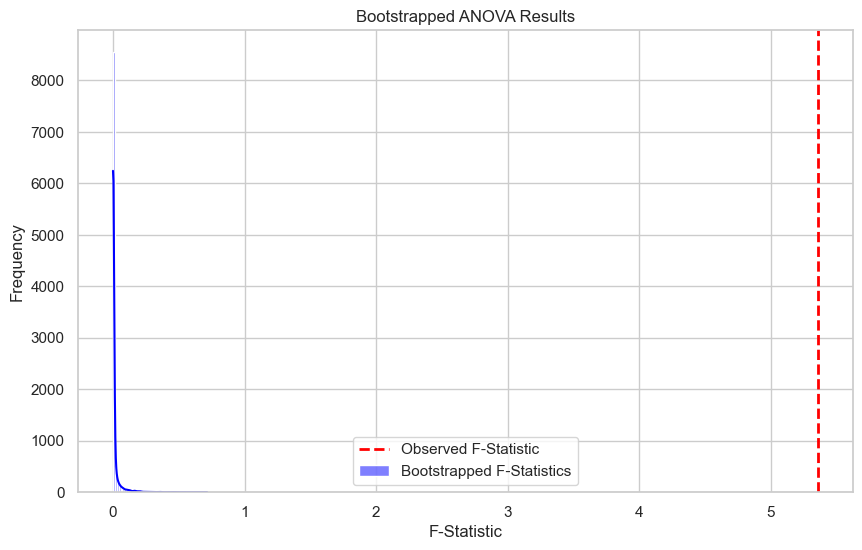

Bootstrapped p-value:  0.0
We reject Null hypothesis and conclude that Score is dependent on Race/Ethnicity.


In [65]:
def bootstrap_anova(*groups, num_resamples=10000):
    f_statistic_bootstrapped = np.zeros(num_resamples)
    for i in range(num_resamples):
        samples = [np.random.choice(group, len(group), replace=True) for group in groups]
        _, f_statistic_bootstrapped[i] = f_oneway(*samples)
    return f_statistic_bootstrapped

f_statistic_observed, p_value_observed = f_oneway(groupA, groupB, groupC, groupD)

f_statistic_bootstrapped = bootstrap_anova(groupA, groupB, groupC, groupD)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(f_statistic_bootstrapped, bins=50, kde=True, color='blue', label='Bootstrapped F-Statistics')
plt.axvline(f_statistic_observed, color='red', linestyle='dashed', linewidth=2, label='Observed F-Statistic')
plt.xlabel('F-Statistic')
plt.ylabel('Frequency')
plt.title('Bootstrapped ANOVA Results')
plt.legend()
plt.show()

p_value_bootstrapped = (f_statistic_bootstrapped > f_statistic_observed).mean()

alpha = 0.05
if p_value_bootstrapped < alpha:
    print('Bootstrapped p-value: ', p_value_bootstrapped)
    print('We reject Null hypothesis and conclude that Score is dependent on Race/Ethnicity.')
else:
    print('Bootstrapped p-value: ', p_value_bootstrapped)
    print('We fail to reject Null Hypothesis based on bootstrapped results.')

# Number 3

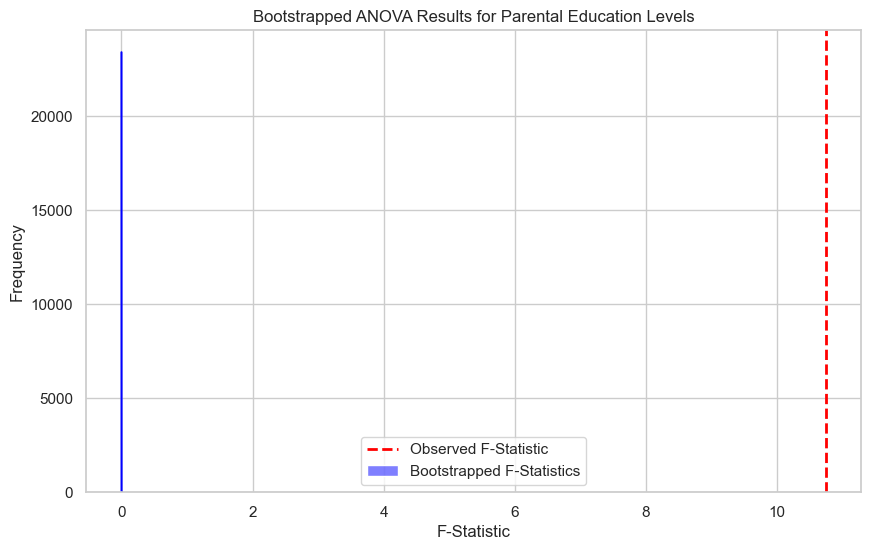

Bootstrapped p-value:  0.0
We reject Null hypothesis and conclude that Score is dependent for all levels of parental education.


In [66]:
def bootstrap_anova(*groups, num_resamples=10000):
    f_statistic_bootstrapped = np.zeros(num_resamples)
    for i in range(num_resamples):
        samples = [np.random.choice(group, len(group), replace=True) for group in groups]
        _, f_statistic_bootstrapped[i] = f_oneway(*samples)
    return f_statistic_bootstrapped

f_statistic_observed, p_value_observed = f_oneway(bachelor, college, masters, associate, highschool, sub_highschool)

f_statistic_bootstrapped = bootstrap_anova(bachelor, college, masters, associate, highschool, sub_highschool)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(f_statistic_bootstrapped, bins=50, kde=True, color='blue', label='Bootstrapped F-Statistics')
plt.axvline(f_statistic_observed, color='red', linestyle='dashed', linewidth=2, label='Observed F-Statistic')
plt.xlabel('F-Statistic')
plt.ylabel('Frequency')
plt.title('Bootstrapped ANOVA Results for Parental Education Levels')
plt.legend()
plt.show()

p_value_bootstrapped = (f_statistic_bootstrapped > f_statistic_observed).mean()

alpha = 0.05
if p_value_bootstrapped < alpha:
    print('Bootstrapped p-value: ', p_value_bootstrapped)
    print('We reject Null hypothesis and conclude that Score is dependent for all levels of parental education.')
else:
    print('Bootstrapped p-value: ', p_value_bootstrapped)
    print('We fail to reject Null Hypothesis based on bootstrapped results, and we conclude that students\' scores are independent for all levels of parental education.')


# Number 4

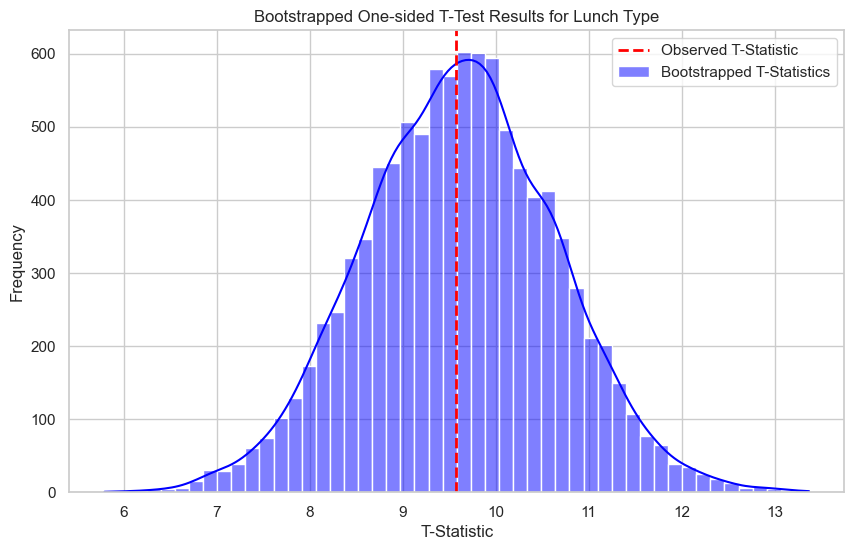

Bootstrapped p-value:  0.5165
We fail to reject Null Hypothesis based on bootstrapped results, and we conclude that students' scores are independent on lunch type.


In [67]:
def bootstrap_ttest(data1, data2, num_resamples=10000):
    t_statistic_bootstrapped = np.zeros(num_resamples)
    for i in range(num_resamples):
        sample1 = np.random.choice(data1, len(data1), replace=True)
        sample2 = np.random.choice(data2, len(data2), replace=True)
        t_statistic_bootstrapped[i], _ = ttest_ind(sample1, sample2, alternative='greater')
    return t_statistic_bootstrapped

t_statistic_observed, p_value_observed = ttest_ind(standard, free, alternative='greater')

t_statistic_bootstrapped = bootstrap_ttest(standard, free)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(t_statistic_bootstrapped, bins=50, kde=True, color='blue', label='Bootstrapped T-Statistics')
plt.axvline(t_statistic_observed, color='red', linestyle='dashed', linewidth=2, label='Observed T-Statistic')
plt.xlabel('T-Statistic')
plt.ylabel('Frequency')
plt.title('Bootstrapped One-sided T-Test Results for Lunch Type')
plt.legend()
plt.show()

p_value_bootstrapped = (t_statistic_bootstrapped > t_statistic_observed).mean()

alpha = 0.05
if p_value_bootstrapped < alpha:
    print('Bootstrapped p-value: ', p_value_bootstrapped)
    print('We reject Null hypothesis and conclude that Score is dependent on lunch type.')
else:
    print('Bootstrapped p-value: ', p_value_bootstrapped)
    print('We fail to reject Null Hypothesis based on bootstrapped results, and we conclude that students\' scores are independent on lunch type.')


# Number 5

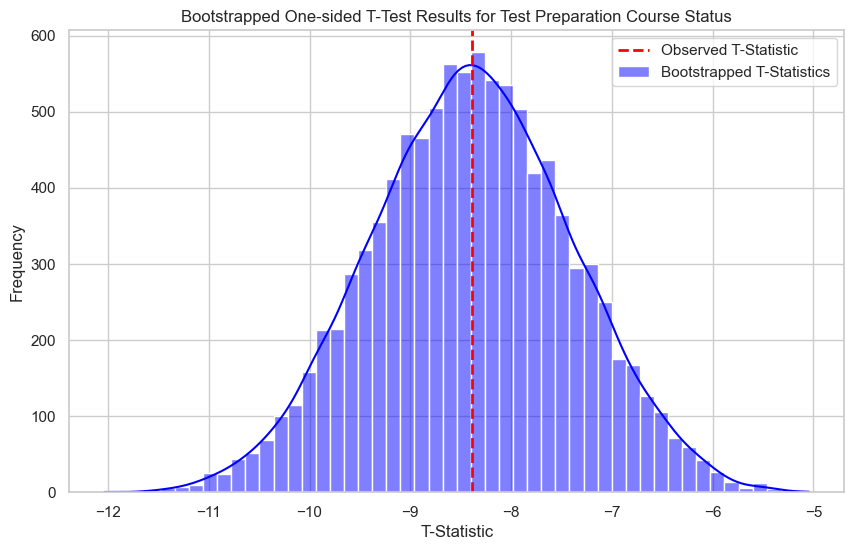

Bootstrapped p-value:  0.5005
We fail to reject Null Hypothesis based on bootstrapped results, and we conclude that students' scores are independent of test preparation course status.


In [68]:
def bootstrap_ttest(data1, data2, num_resamples=10000):
    t_statistic_bootstrapped = np.zeros(num_resamples)
    for i in range(num_resamples):
        sample1 = np.random.choice(data1, len(data1), replace=True)
        sample2 = np.random.choice(data2, len(data2), replace=True)
        t_statistic_bootstrapped[i], _ = ttest_ind(sample1, sample2, alternative='less')
    return t_statistic_bootstrapped

t_statistic_observed, p_value_observed = ttest_ind(none, completed, alternative='less')

t_statistic_bootstrapped = bootstrap_ttest(none, completed)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(t_statistic_bootstrapped, bins=50, kde=True, color='blue', label='Bootstrapped T-Statistics')
plt.axvline(t_statistic_observed, color='red', linestyle='dashed', linewidth=2, label='Observed T-Statistic')
plt.xlabel('T-Statistic')
plt.ylabel('Frequency')
plt.title('Bootstrapped One-sided T-Test Results for Test Preparation Course Status')
plt.legend()
plt.show()

p_value_bootstrapped = (t_statistic_bootstrapped < t_statistic_observed).mean()

alpha = 0.05
if p_value_bootstrapped < alpha:
    print('Bootstrapped p-value: ', p_value_bootstrapped)
    print('We reject Null hypothesis and conclude that Score is dependent on test preparation course status.')
else:
    print('Bootstrapped p-value: ', p_value_bootstrapped)
    print('We fail to reject Null Hypothesis based on bootstrapped results, and we conclude that students\' scores are independent of test preparation course status.')


# Number 6

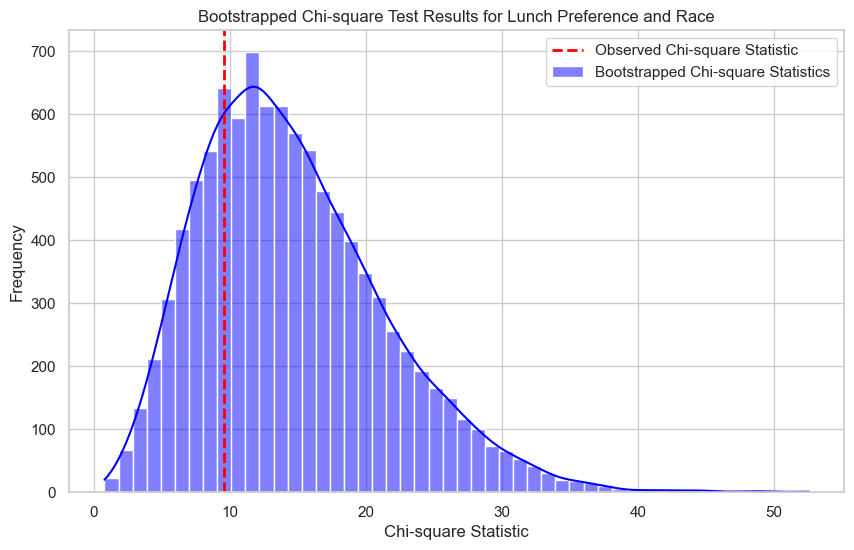

Bootstrapped p-value:  0.7498
We fail to reject Null Hypothesis based on bootstrapped results, and we conclude that Preference of Lunch is not dependent on Race.


In [69]:
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

def bootstrap_chi2(contingency_table, num_resamples=10000):
    chi2_statistic_bootstrapped = np.zeros(num_resamples)
    for i in range(num_resamples):
        sampled_table = np.random.multinomial(contingency_table.sum().sum(), contingency_table.values.flatten() / contingency_table.values.flatten().sum())
        sampled_table = sampled_table.reshape(contingency_table.shape)
        
        chi2_statistic_bootstrapped[i], _, _, _ = chi2_contingency(sampled_table)
    return chi2_statistic_bootstrapped

observed_chi2, _, _, _ = chi2_contingency(contingency)

chi2_statistic_bootstrapped = bootstrap_chi2(contingency)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(chi2_statistic_bootstrapped, bins=50, kde=True, color='blue', label='Bootstrapped Chi-square Statistics')
plt.axvline(observed_chi2, color='red', linestyle='dashed', linewidth=2, label='Observed Chi-square Statistic')
plt.xlabel('Chi-square Statistic')
plt.ylabel('Frequency')
plt.title('Bootstrapped Chi-square Test Results for Lunch Preference and Race')
plt.legend()
plt.show()

p_value_bootstrapped = (chi2_statistic_bootstrapped > observed_chi2).mean()

alpha = 0.05
if p_value_bootstrapped < alpha:
    print('Bootstrapped p-value: ', p_value_bootstrapped)
    print('We reject Null hypothesis and conclude that Preference of Lunch is dependent on Race.')
else:
    print('Bootstrapped p-value: ', p_value_bootstrapped)
    print('We fail to reject Null Hypothesis based on bootstrapped results, and we conclude that Preference of Lunch is not dependent on Race.')


# Number 7

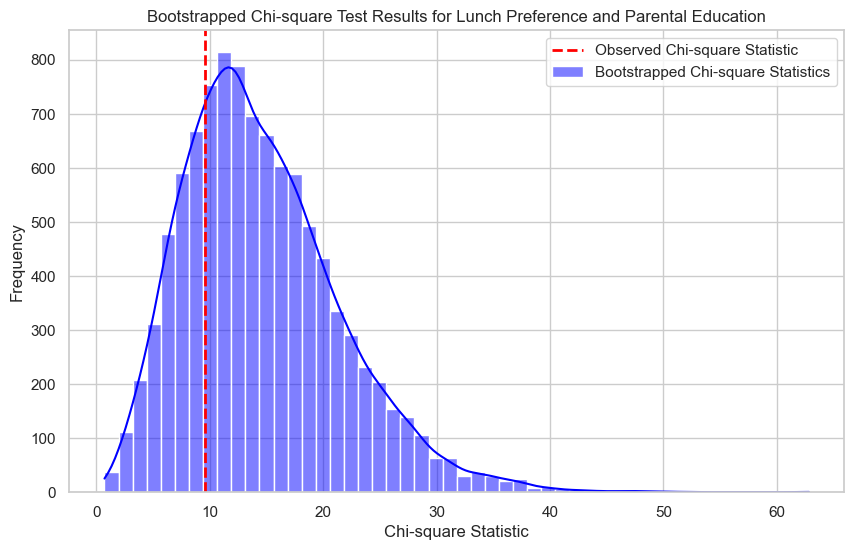

Bootstrapped p-value:  0.7516
We fail to reject Null Hypothesis based on bootstrapped results, and we conclude that Preference of Lunch is not dependent on parental level of education.


In [70]:
def bootstrap_chi2(contingency_table, num_resamples=10000):
    chi2_statistic_bootstrapped = np.zeros(num_resamples)
    for i in range(num_resamples):
        sampled_table = np.random.multinomial(contingency_table.sum().sum(), contingency_table.values.flatten() / contingency_table.values.flatten().sum())
        sampled_table = sampled_table.reshape(contingency_table.shape)
        
        chi2_statistic_bootstrapped[i], _, _, _ = chi2_contingency(sampled_table)
    return chi2_statistic_bootstrapped

observed_chi2, _, _, _ = chi2_contingency(contingency)

chi2_statistic_bootstrapped = bootstrap_chi2(contingency)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(chi2_statistic_bootstrapped, bins=50, kde=True, color='blue', label='Bootstrapped Chi-square Statistics')
plt.axvline(observed_chi2, color='red', linestyle='dashed', linewidth=2, label='Observed Chi-square Statistic')
plt.xlabel('Chi-square Statistic')
plt.ylabel('Frequency')
plt.title('Bootstrapped Chi-square Test Results for Lunch Preference and Parental Education')
plt.legend()
plt.show()

p_value_bootstrapped = (chi2_statistic_bootstrapped > observed_chi2).mean()

alpha = 0.05
if p_value_bootstrapped < alpha:
    print('Bootstrapped p-value: ', p_value_bootstrapped)
    print('We reject Null hypothesis and conclude that Preference of Lunch is dependent on parental level of education.')
else:
    print('Bootstrapped p-value: ', p_value_bootstrapped)
    print('We fail to reject Null Hypothesis based on bootstrapped results, and we conclude that Preference of Lunch is not dependent on parental level of education.')


# Number 8

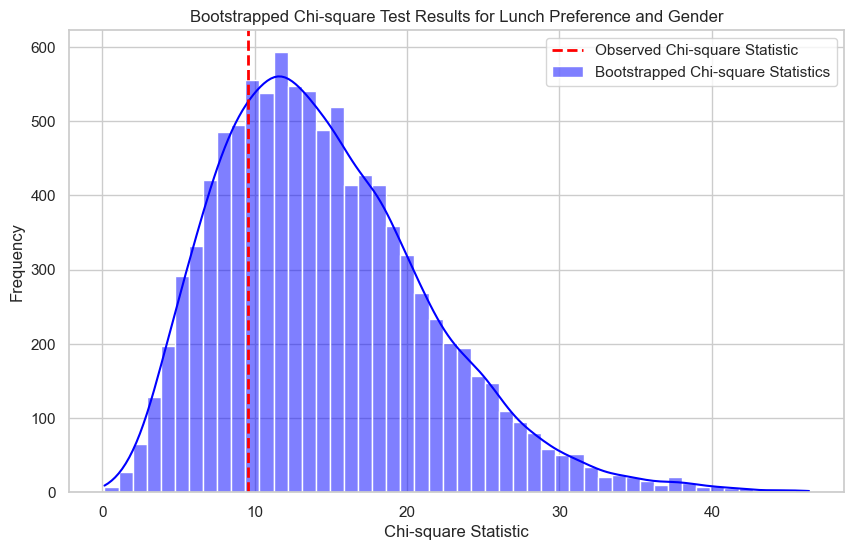

Bootstrapped p-value:  0.7456
We fail to reject Null Hypothesis based on bootstrapped results, and we conclude that Preference of Lunch is not dependent on gender.


In [71]:
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

def bootstrap_chi2(contingency_table, num_resamples=10000):
    chi2_statistic_bootstrapped = np.zeros(num_resamples)
    for i in range(num_resamples):
        sampled_table = np.random.multinomial(contingency_table.sum().sum(), contingency_table.values.flatten() / contingency_table.values.flatten().sum())
        sampled_table = sampled_table.reshape(contingency_table.shape)
        
        chi2_statistic_bootstrapped[i], _, _, _ = chi2_contingency(sampled_table)
    return chi2_statistic_bootstrapped

observed_chi2, _, _, _ = chi2_contingency(contingency)

chi2_statistic_bootstrapped = bootstrap_chi2(contingency)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(chi2_statistic_bootstrapped, bins=50, kde=True, color='blue', label='Bootstrapped Chi-square Statistics')
plt.axvline(observed_chi2, color='red', linestyle='dashed', linewidth=2, label='Observed Chi-square Statistic')
plt.xlabel('Chi-square Statistic')
plt.ylabel('Frequency')
plt.title('Bootstrapped Chi-square Test Results for Lunch Preference and Gender')
plt.legend()
plt.show()

p_value_bootstrapped = (chi2_statistic_bootstrapped > observed_chi2).mean()

alpha = 0.05
if p_value_bootstrapped < alpha:
    print('Bootstrapped p-value: ', p_value_bootstrapped)
    print('We reject Null hypothesis and conclude that Preference of Lunch is dependent on gender.')
else:
    print('Bootstrapped p-value: ', p_value_bootstrapped)
    print('We fail to reject Null Hypothesis based on bootstrapped results, and we conclude that Preference of Lunch is not dependent on gender.')


# Number 9

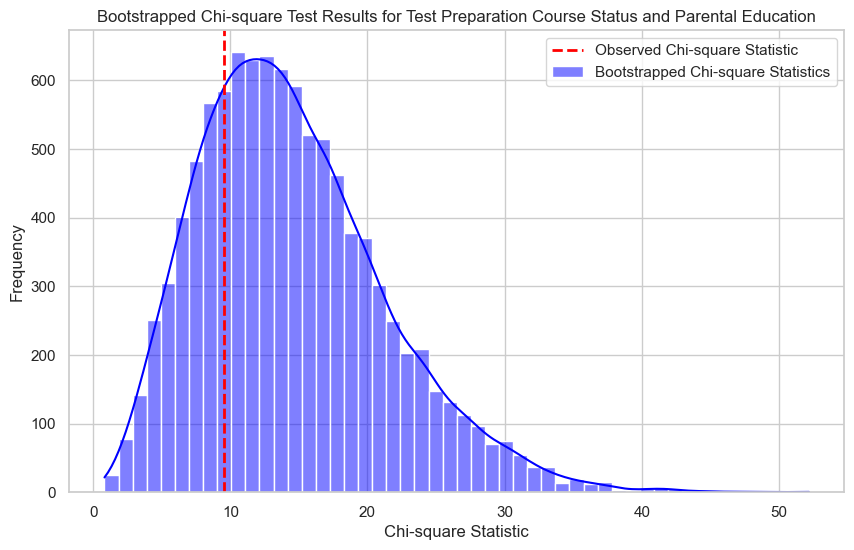

Bootstrapped p-value:  0.7478
We fail to reject Null Hypothesis based on bootstrapped results, and we conclude that Test preparation course status is not dependent on parental level of education.


In [72]:
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

def bootstrap_chi2(contingency_table, num_resamples=10000):
    chi2_statistic_bootstrapped = np.zeros(num_resamples)
    for i in range(num_resamples):
        sampled_table = np.random.multinomial(contingency_table.sum().sum(), contingency_table.values.flatten() / contingency_table.values.flatten().sum())
        sampled_table = sampled_table.reshape(contingency_table.shape)
        
        chi2_statistic_bootstrapped[i], _, _, _ = chi2_contingency(sampled_table)
    return chi2_statistic_bootstrapped

observed_chi2, _, _, _ = chi2_contingency(contingency)

chi2_statistic_bootstrapped = bootstrap_chi2(contingency)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(chi2_statistic_bootstrapped, bins=50, kde=True, color='blue', label='Bootstrapped Chi-square Statistics')
plt.axvline(observed_chi2, color='red', linestyle='dashed', linewidth=2, label='Observed Chi-square Statistic')
plt.xlabel('Chi-square Statistic')
plt.ylabel('Frequency')
plt.title('Bootstrapped Chi-square Test Results for Test Preparation Course Status and Parental Education')
plt.legend()
plt.show()

p_value_bootstrapped = (chi2_statistic_bootstrapped > observed_chi2).mean()

alpha = 0.05
if p_value_bootstrapped < alpha:
    print('Bootstrapped p-value: ', p_value_bootstrapped)
    print('We reject Null hypothesis and conclude that Test preparation course status is dependent on parental level of education.')
else:
    print('Bootstrapped p-value: ', p_value_bootstrapped)
    print('We fail to reject Null Hypothesis based on bootstrapped results, and we conclude that Test preparation course status is not dependent on parental level of education.')
